In [4]:
import pandas as pd
import scipy.sparse
import scipy
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [5]:
train_clean = pd.read_csv('Data/train_clean.tsv', sep='\t', header=0)

In [6]:
#Baseline Prediction: get the mean values per category_name_1
mean_values = train_clean.groupby('category_name_1')['price'].mean()
df_means = pd.DataFrame(mean_values)
df_means.reset_index(inplace=True)
df_means.rename(columns={'price':'prediction'}, inplace=True)

#splitting train_clean into train_base and test_base as our test.tsv has no price labels for us to check against
train_base = train_clean.iloc[:1000000,:]
test_base = train_clean.iloc[1000000:,:]

In [7]:
#testFile = pd.read_csv('Data/test.tsv', sep='\t', header=0)

#split by category_name
#df.join(df['AB'].str.split('-', 1, expand=True).rename(columns={0:'A', 1:'B'}))
#testFile['category_name'].str.split('/',2, expand=True).rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [15]:
#import train_term_matrix
train_sparse = scipy.io.mmread('Data/train_term_matrix_pruned.mtx')
y = train_clean['price']
#tf_idf = TfidfTransformer()

#train_sparse_tfidf = tf_idf.fit_transform(train_sparse)


In [16]:
# Sample Data to reduce the size
numSamples = 100000
train_sparse_sample, y_sample = resample(train_sparse, y, 
                               n_samples=numSamples,
                               random_state=777)

In [18]:
print('sparse shape', y_sample.shape)

sparse shape (100000,)


In [19]:
from sklearn.model_selection import train_test_split


XTrain, XTest, yTrain, yTest = train_test_split(train_sparse_sample, y_sample,
                                                test_size=0.33, random_state=95828)

## Baseline Model - Use average of category_name_1 products

In [20]:
from sklearn.metrics import mean_squared_error

#merge with df_means to get mean 'prediction'
test_base_pred = test_base.merge(df_means, how='left', on='category_name_1')

#remove rows with NaN in category_1
test_base_pred = test_base_pred[test_base_pred.category_name_1.notnull()]

mse_base = mean_squared_error(test_base_pred['price'], test_base_pred['prediction'])
print('Baseline model MSE = {:.2f}'.format(mse_base))


Baseline model MSE = 1450.86


## Regression Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tReg = DecisionTreeRegressor(random_state=0)
pred_tReg = tReg.fit(XTrain, yTrain).predict(XTest)

mse_tReg = mean_squared_error(yTest, pred_tReg)
print('DecisionTree Regressor: MSE = {:.2f}'.format(mse_tReg))

#add GridSearch later
# params_maxDepth = {'max_depth':[2,5,10,15,20]}
# clf = GridSearchCV(treeReg, params_maxDepth)
# clf.fit(XTrain, yTrain)

DecisionTree Regressor: MSE = 2007.81


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
pred_rf = rf.fit(XTrain, yTrain).predict(XTest)

mse_rf = mean_squared_error(yTest, pred_rf)
print('RandomForest Regressor: MSE = {:.2f}'.format(mse_rf))

## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

#svrRBF = SVR(kernel='rbf', C=1000, gamma=0.1)
#svrLIN = SVR(kernel='linear', C=1000)
svrPOLY = SVR(kernel='poly', C=1000, degree=3)
pred_svrPOLY = svrPOLY.fit(XTrain, yTrain).predict(XTest)

mse_svrPOLY = mean_squared_error(yTest, pred_svrPOLY)
print('Support Vector Regresion: MSE = {:.2f}'.format(mse_svrPOLY))

## Ridge Regression

In [21]:
%%time
from sklearn.linear_model import Ridge

#add in gridsearch later
ridge = Ridge(alpha=1.0)
pred_ridge = ridge.fit(XTrain, yTrain).predict(XTest)

mse_ridge = mean_squared_error(yTest, pred_ridge)
print('Ridge Regression: MSE = {:.2f}'.format(mse_ridge))

Ridge Regression: MSE = 1350.89
CPU times: user 13.5 s, sys: 49.7 ms, total: 13.5 s
Wall time: 13.6 s


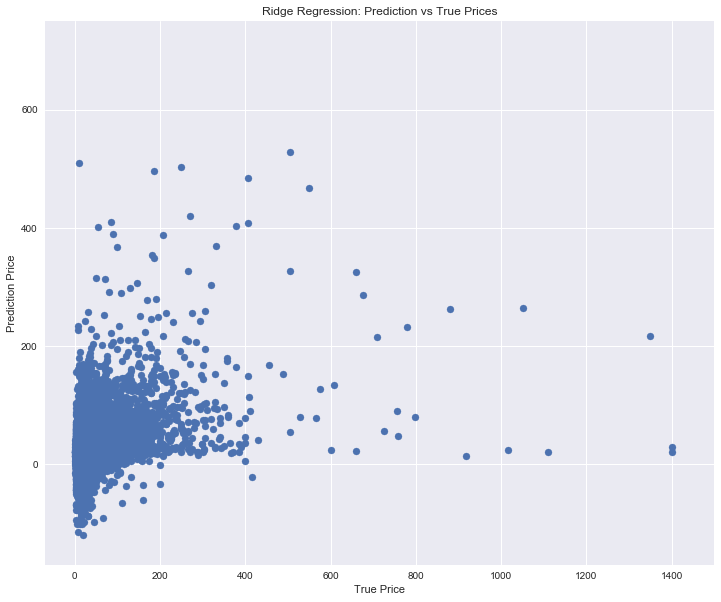

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(yTest, pred_ridge)
plt.ylabel("Prediction Price")
plt.ylim(ymax = 750)
plt.xlim(xmax = 1500)
plt.xlabel("True Price")
plt.title("Ridge Regression: Prediction vs True Prices");

## Regression Models that take sparse matrices (

BaggingRegressor

ExtraTreesRegressor
AdaBoostRegressor
KNeighborsRegressor
SVR
SGDRegressor

Linear Regression
Ridge Regression
Lasso Regression
ElasticNet
PassiveAggressiveRegressor
RANSACRegressor
KernelRidge
NuSVR
LinearSVR
RadiusNeighborsRegressor
MultiOutputRegressor
MLPRegressor